# Multivariate Visualization

In [254]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

df= pd.read_csv('fuel-econ.csv')
pokemon = pd.read_csv('pokemon.csv')

df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Color Shape Size Encoding
**Non-Positional Encodings for Third Variables**
There are four major cases to consider when we want to plot three variables together:

three numeric variables
two numeric variables and one categorical variable
one numeric variable and two categorical variables
three categorical variables
If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e. where we have at least two categorical variables.)

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

## Shape encoding

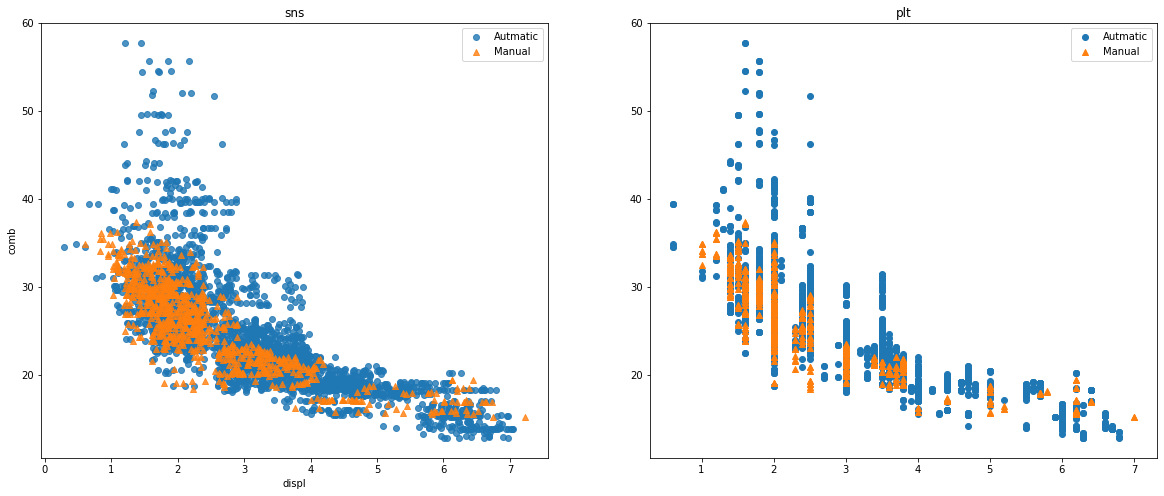

In [255]:
#optional to order classes
classes=['Minicompact Cars','Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses=pd.api.types.CategoricalDtype(categories=classes, ordered=True)
df.VClass=df.VClass.astype(vclasses)

df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
marker_lst=[['Automatic','o'],['Manual','^']]
for ttype,mark in marker_lst:
    df_1=df[df.trans_type == ttype]
    sns.regplot(data=df_1, x='displ', y='comb', fit_reg=False, x_jitter=0.4, marker=mark );
    plt.title('sns')
    plt.legend(['Autmatic','Manual'])
plt.subplot(1,2,2)
for ttype,mark in marker_lst:
    df_1=df[df.trans_type == ttype]
    plt.scatter(data=df_1, x='displ', y='comb', marker=mark );
    plt.title('plt')
    plt.legend(['Autmatic','Manual'])


## Size encoding

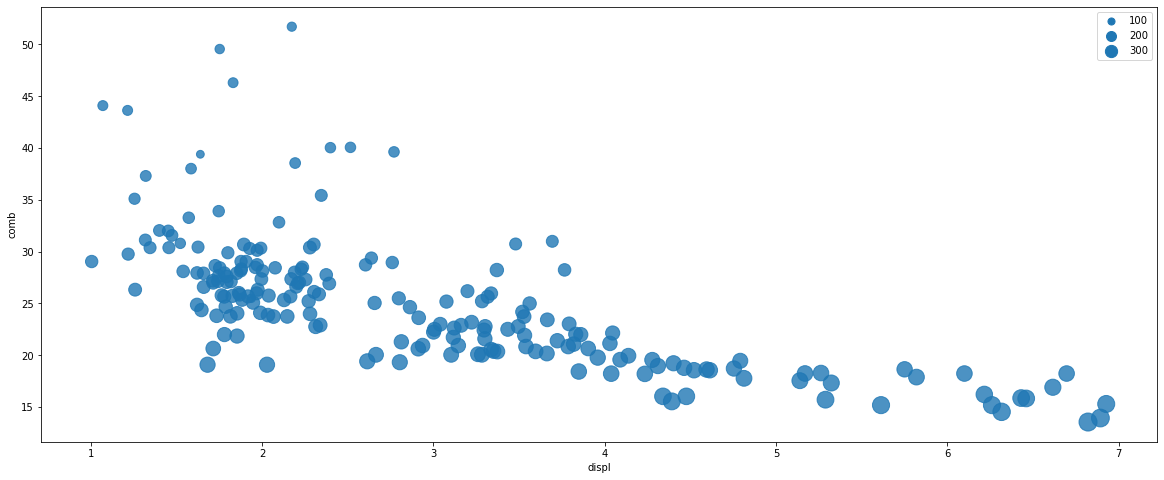

In [256]:
df_sample=df.sample(200)
plt.figure(figsize=(20,8))

sns.regplot(data=df_sample, x='displ', y='comb', fit_reg=False, x_jitter=0.4 , scatter_kws={ 's':df_sample['co2']/2});
sizes=[100,200,300]
legend_obj=[]

for i in sizes:
    legend_obj.append(plt.scatter([],[],s=i/2,color=sns.color_palette()[0]))
plt.legend(legend_obj,sizes)

## color mapping

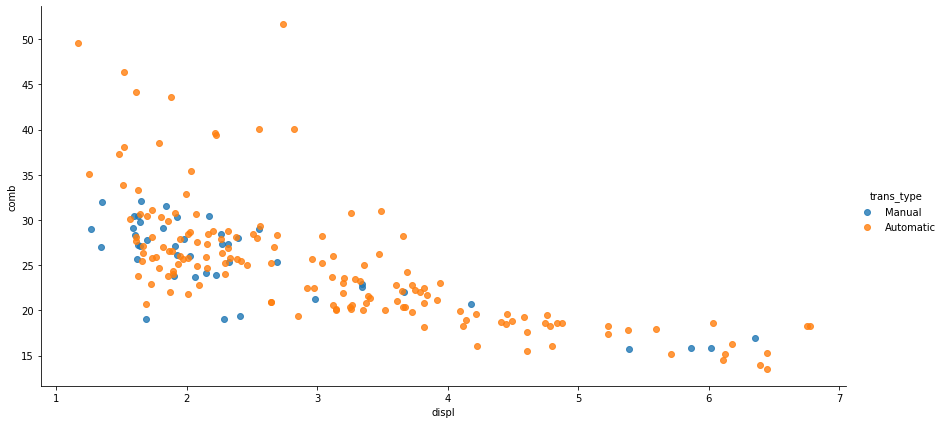

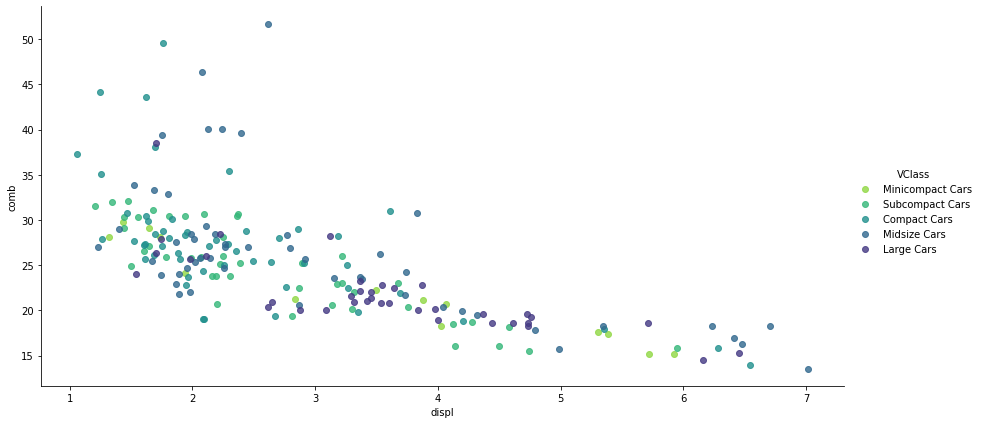

/Users/3m/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


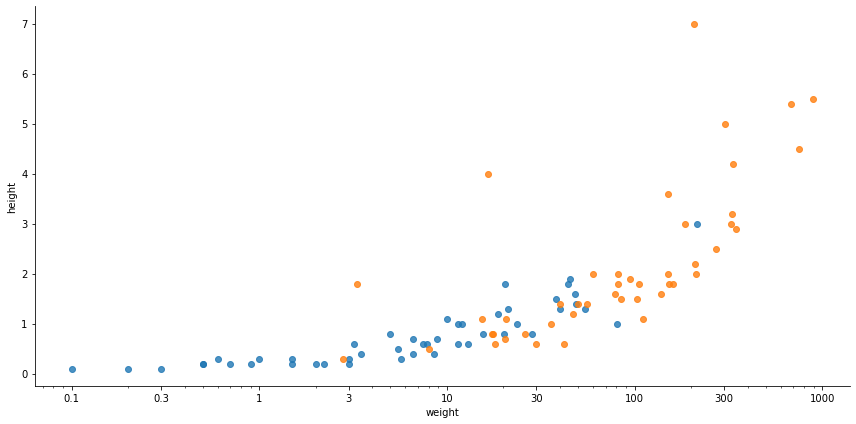

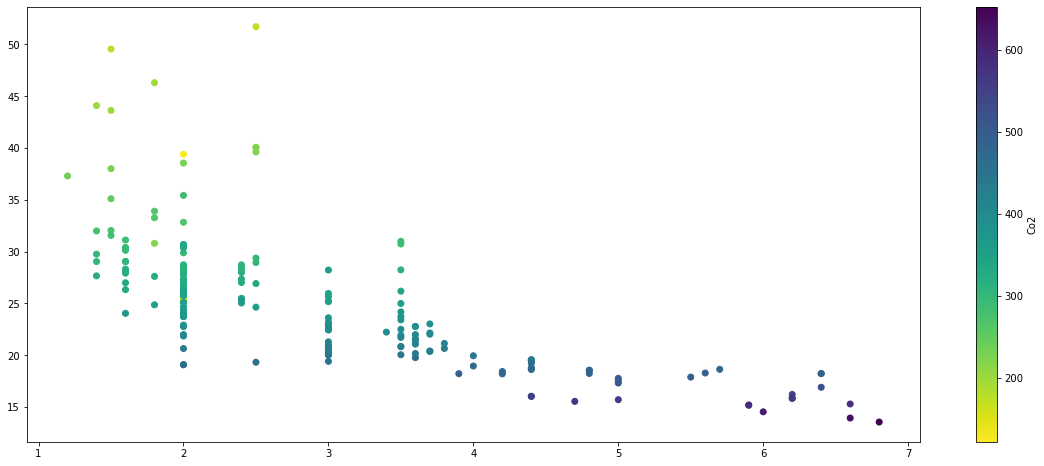

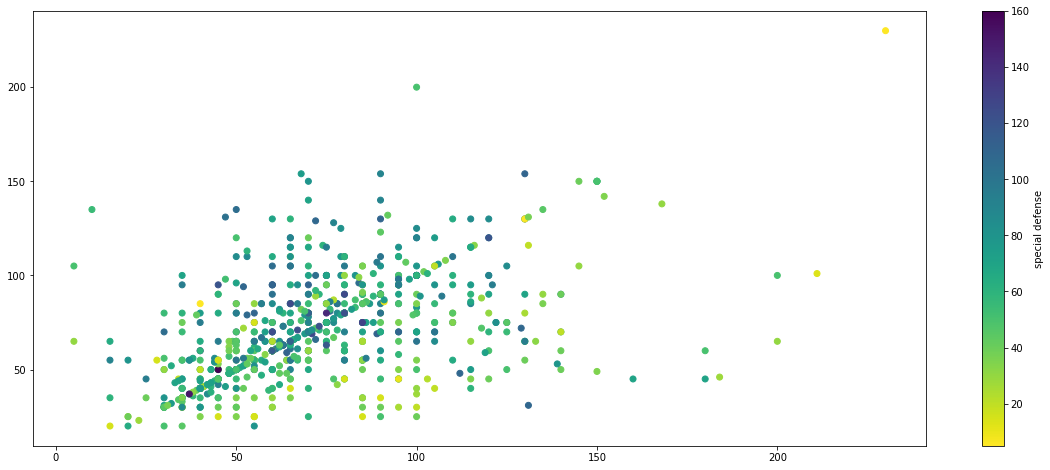

In [257]:
######################################  for a third categorical variable  ######################################

################### fuel econ data ###################
g=sns.FacetGrid(data= df_sample , hue='trans_type'  , height= 6, aspect=2 , hue_order=['Manual','Automatic'])
g.map( sns.regplot , 'displ' , 'comb' , fit_reg=False, x_jitter=0.4 );
g.add_legend();
plt.show()

g=sns.FacetGrid(data= df_sample , hue='VClass'  , height= 6, aspect=2 , palette='viridis_r')
g.map( sns.regplot , 'displ' , 'comb' , fit_reg=False, x_jitter=0.4 );
g.add_legend();
plt.show()
################### pokemon data ###################
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
df2=pkmn_types[pkmn_types.type.isin(['dragon','fairy'])]
g=sns.FacetGrid(data=df2,hue='type', size=6,aspect=2)
g.map(sns.regplot,'weight','height',fit_reg=False)
plt.xscale('log')
plt.xticks([.1,.3,1,3,10,30,100,300,1000],[.1,.3,1,3,10,30,100,300,1000]);

######################################  for a third quatitiaive variable  ######################################
plt.figure(figsize=(20,8))
plt.scatter(data=df_sample, x='displ', y='comb',c='co2' , cmap='viridis_r');
plt.colorbar(label='Co2')
plt.show()
################### pokemon data ###################
plt.figure(figsize=(20,8))
plt.scatter(data=pokemon,x='defense',y='special-defense',c='speed',cmap='viridis_r')
plt.colorbar(label='special defense');


## Faceting in Two Directions

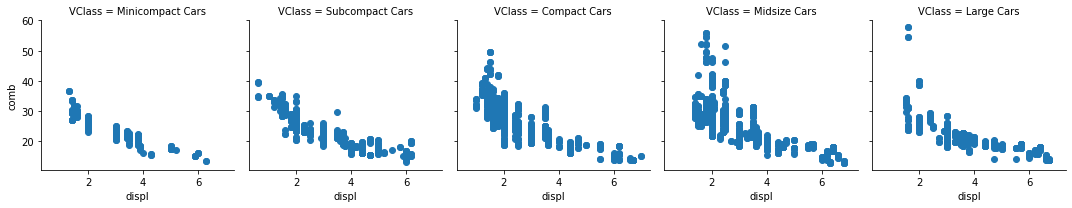

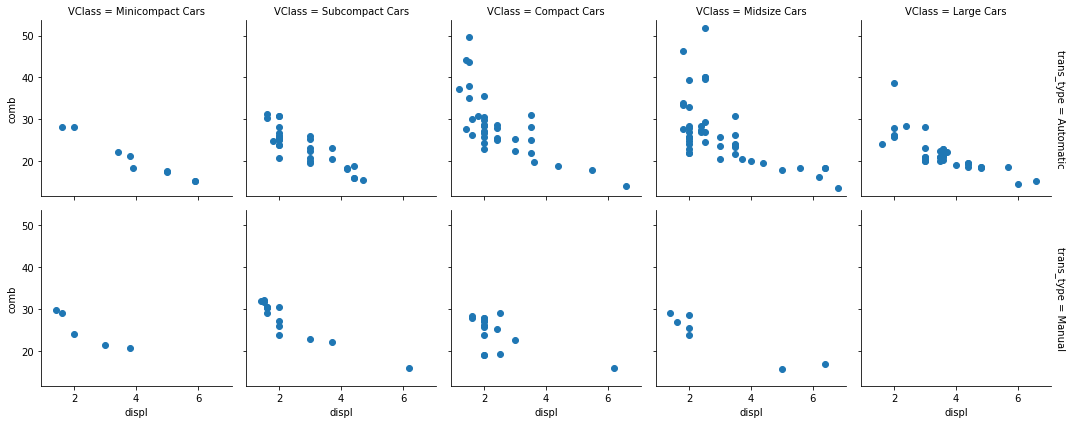

In [258]:
# Fascetting by one categorical variable
g=sns.FacetGrid(data=df, col='VClass')
g.map(plt.scatter,'displ','comb')
plt.show();
# Fascetting by two categorical variable
g=sns.FacetGrid(data=df_sample, col='VClass', row='trans_type',margin_titles=True)
g.map(plt.scatter,'displ','comb');

## Other Adaptations of Bivariate Plots


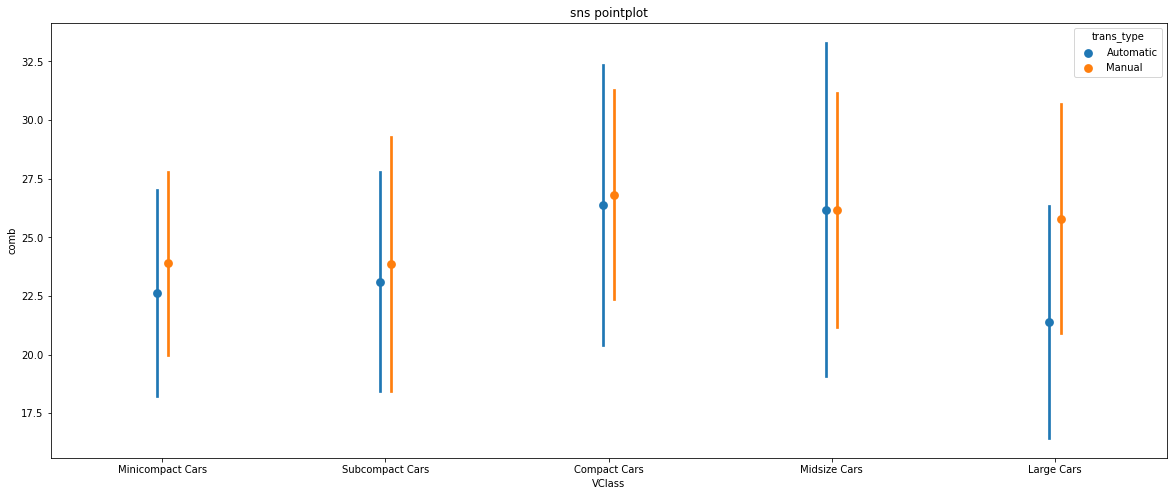

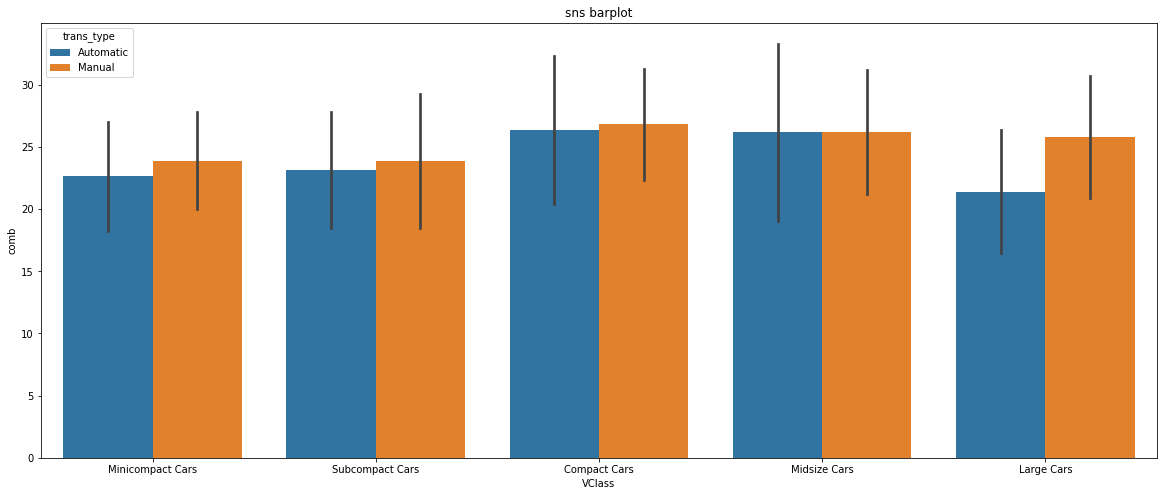

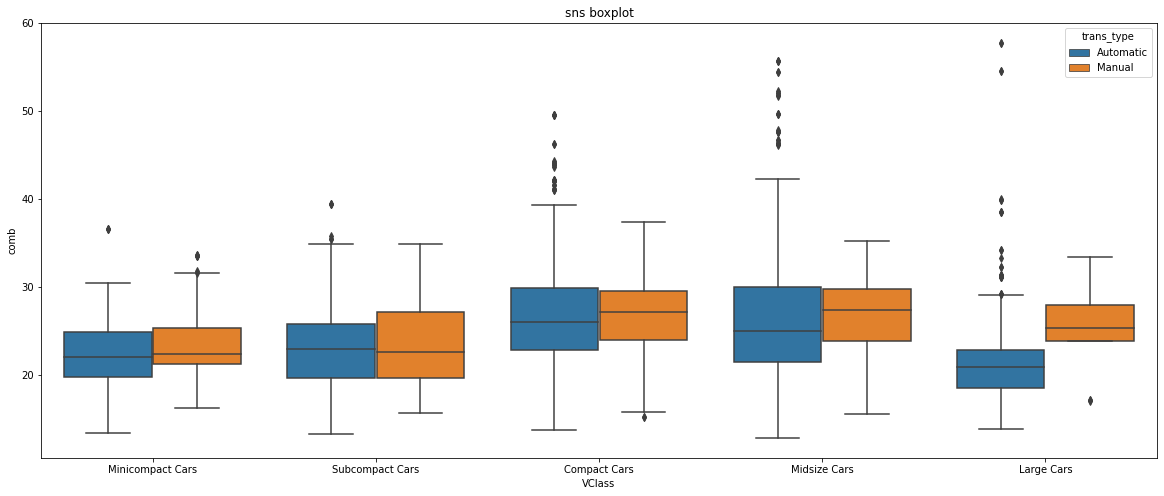

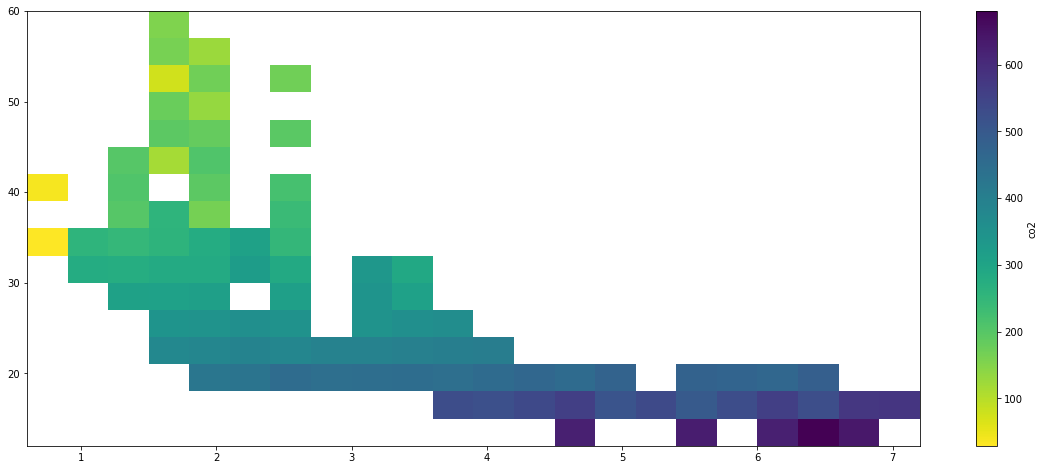

In [259]:
## pointplots
plt.figure(figsize=(20,8))
sns.pointplot(data=df, x='VClass', y='comb', hue='trans_type',ci='sd',dodge=True,linestyles='None')
plt.title('sns pointplot')
plt.show()
## barplot
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type',ci='sd',dodge=True)
plt.title('sns barplot')
plt.show()
## boxplot
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type')
plt.title('sns boxplot')
plt.show()
## heatmap with color based on the mean of a third variable instead of count
plt.figure(figsize=(20,8))
x=df.displ
y=df.comb
bins_x=np.arange(.6,7+.3,.3)
bins_y=np.arange(12,58+3,3)
displ_bins=pd.cut(df['displ'], bins_x, right=False, include_lowest=False,labels=False).astype(int)
comb_bins=pd.cut(df['comb'], bins_y, right=False, include_lowest=False,labels=False).astype(int)

n_points = df.groupby([displ_bins,comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ',columns='comb').values
co2_weights = df['co2'] / n_points[displ_bins,comb_bins]

plt.hist2d(data=df, x='displ', y='comb', weights=co2_weights,bins=[bins_x,bins_y], cmin=0.5,cmap='viridis_r')
plt.colorbar(label='co2');

## Plot Matrices


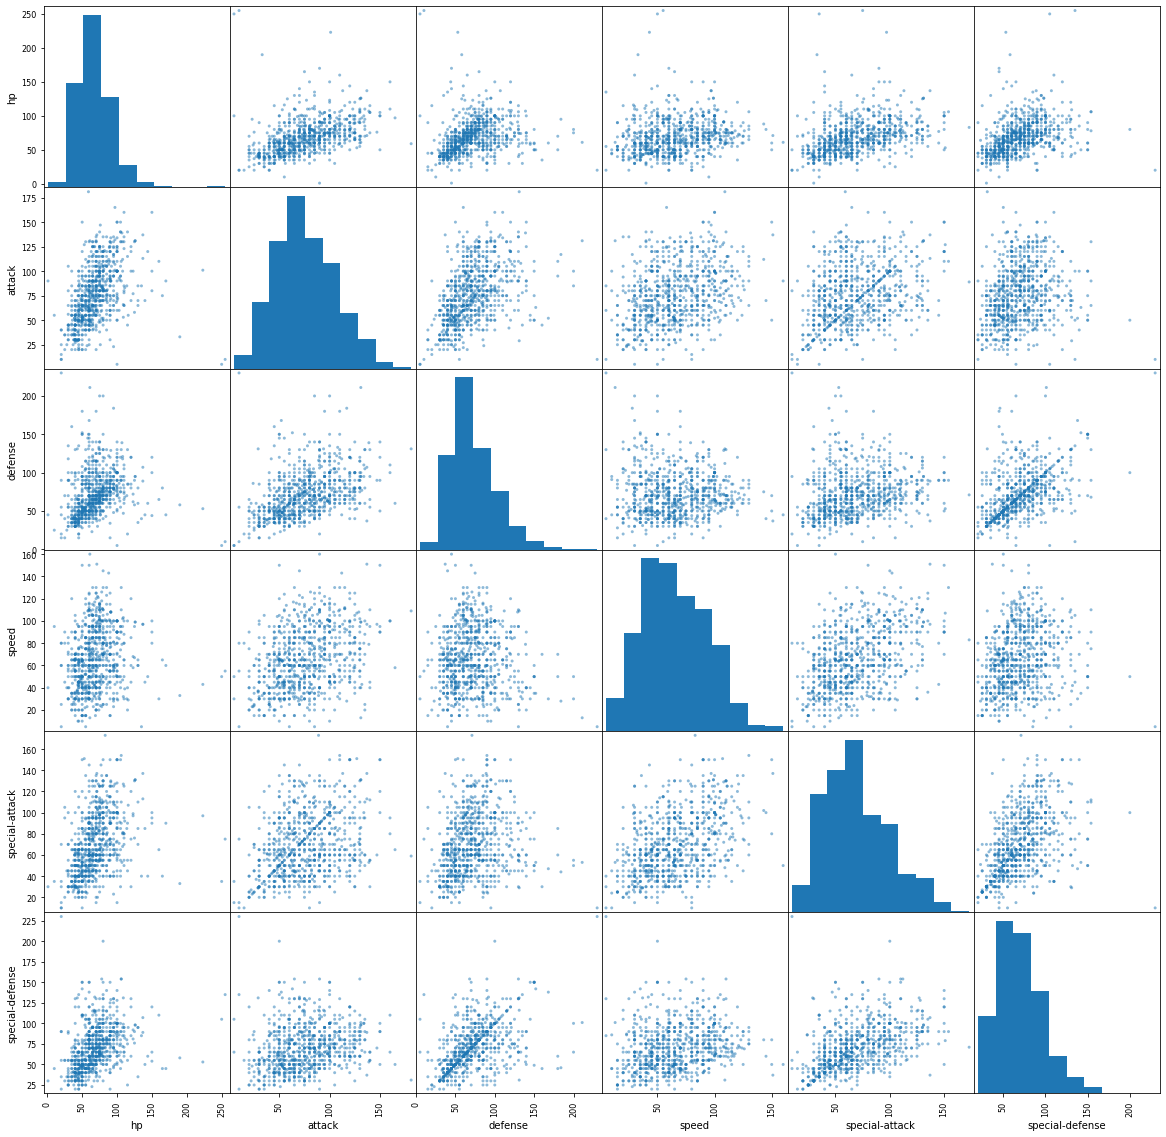

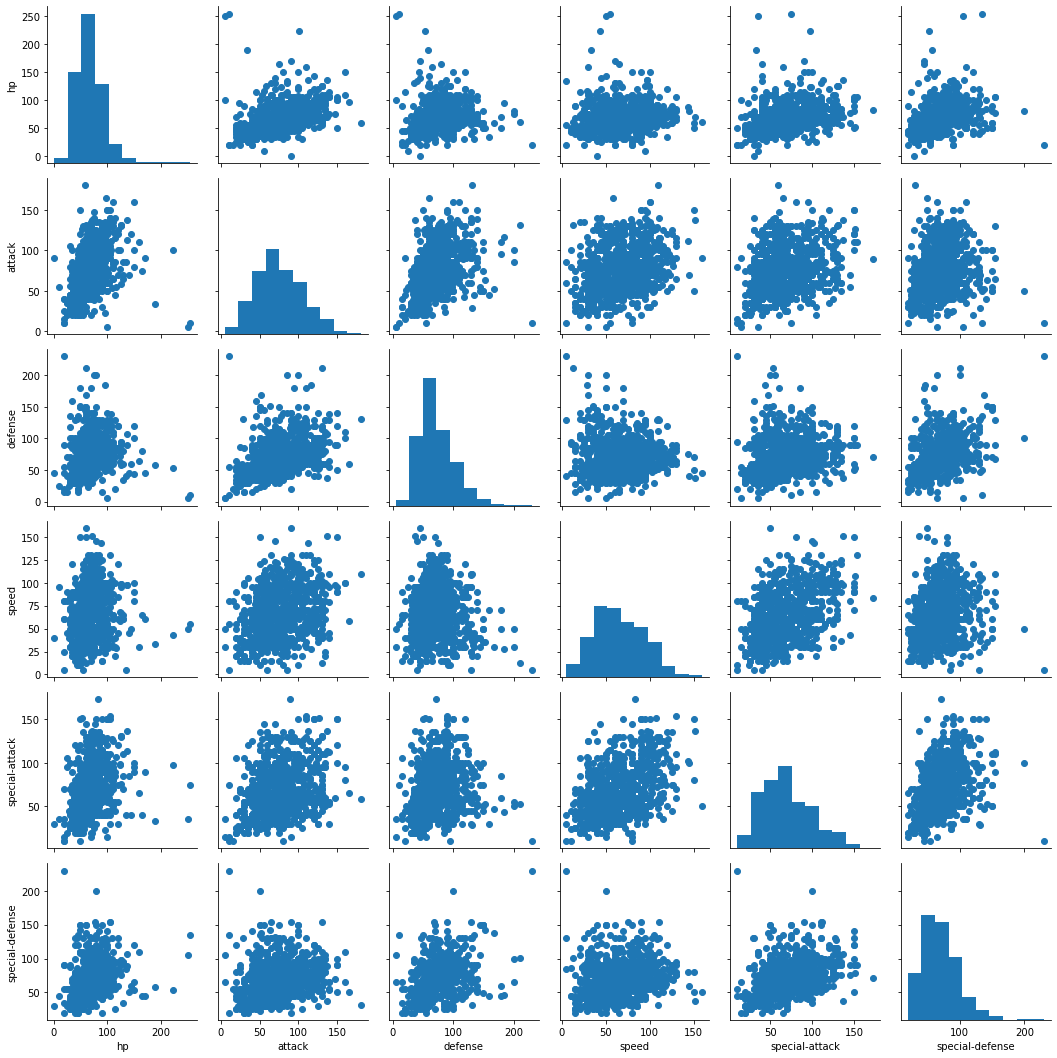

                       hp    attack   defense     speed  special-attack  special-defense
hp               1.000000  0.433318  0.231540  0.169512        0.377446         0.367949
attack           0.433318  1.000000  0.435514  0.335289        0.325937         0.202138
defense          0.231540  0.435514  1.000000 -0.023866        0.199560         0.508688
speed            0.169512  0.335289 -0.023866  1.000000        0.440411         0.202847
special-attack   0.377446  0.325937  0.199560  0.440411        1.000000         0.481345
special-defense  0.367949  0.202138  0.508688  0.202847        0.481345         1.000000


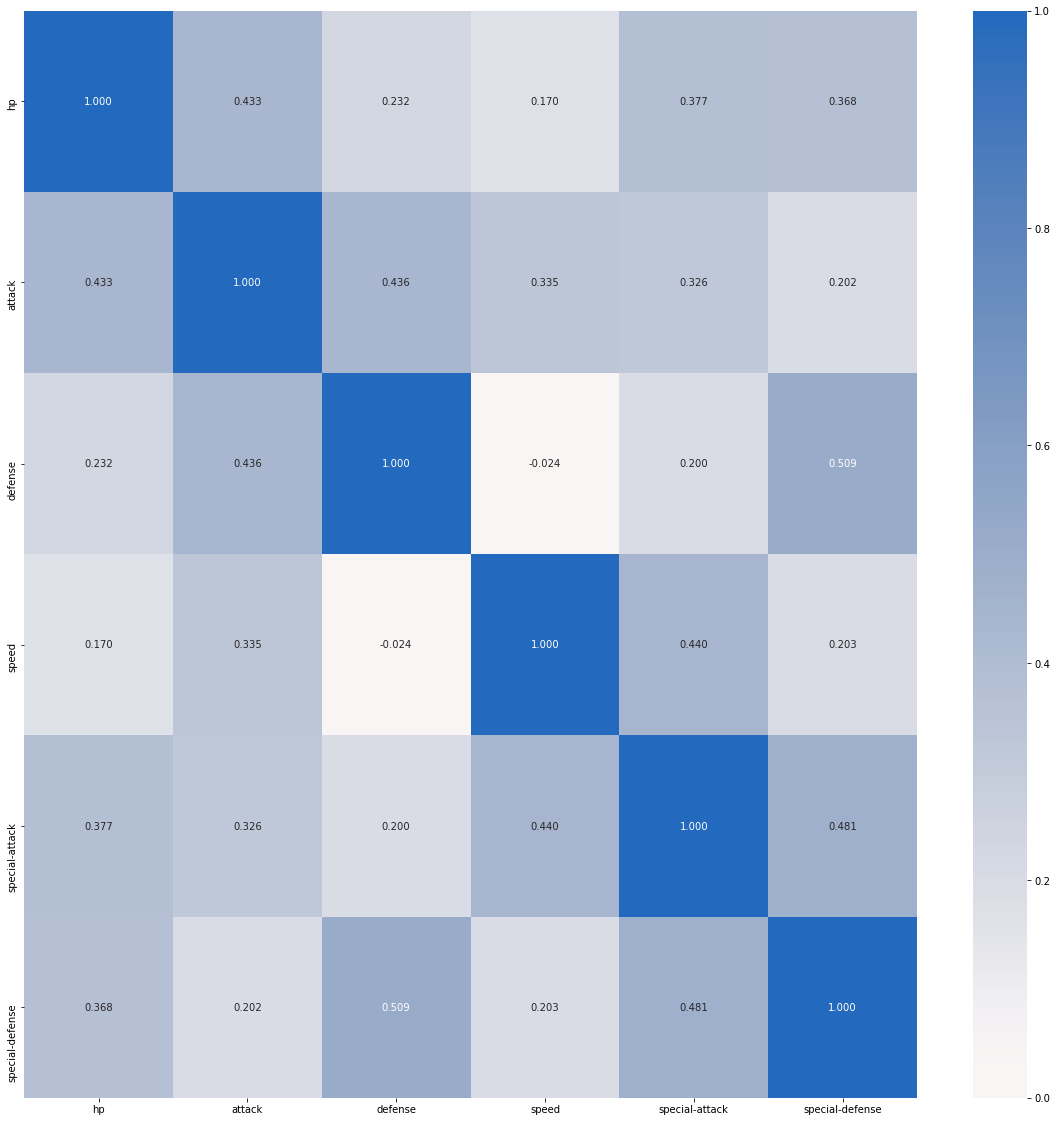

In [287]:
#pd plotting
pok_df=pokemon[['hp','attack','defense','speed','special-attack','special-defense']]
pd.plotting.scatter_matrix(pok_df,figsize=(20,20));
plt.show()
#########################################################################
##sns
g=sns.PairGrid(data=pok_df)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
plt.show()
########################################################################
print(pok_df.corr())
plt.figure(figsize=(20,20))
sns.heatmap(pok_df.corr(),annot=True,fmt='0.3f',vmin=0,cmap = 'vlag_r', center = 0);
plt.show()
########################################################################


In [290]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [299]:
df=pd.read_excel('PSD of Vertical Mirror Raw Data.xlsx')
df.head()

,Histo Bin avg,Bottom,Middle,Top
0,3,0.000043,0.000045,0.000000
1,9,0.001924,0.001039,0.000169
2,15,0.009236,0.002474,0.000985
3,21,0.021626,0.007275,0.003927
4,27,0.040368,0.017598,0.006654


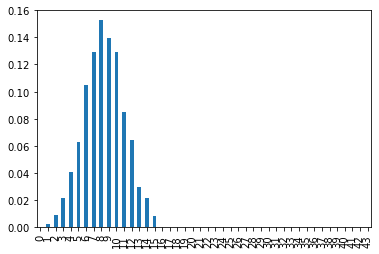

In [318]:
bins=df['Histo Bin avg']
x_1=df['Bottom'].sort_values()
df['Bottom'].plot(kind='bar')
plt.xtic
x_1;